25k_3 images
    shear rate  eccentricity  convex_area  major_axis_length  \
0      25000.0      0.803396         23.0           6.940039   
1      25000.0      0.830375        149.0          17.764211   
2      25000.0      0.800690         46.0           9.367683   
3      25000.0      0.856609        103.0          15.378487   
4      25000.0      0.877616         72.0          12.559256   
5      25000.0      0.879741         70.0          12.844913   
6      25000.0      0.968258        251.0          30.309017   
7      25000.0      0.881559         99.0          15.569358   
8      25000.0      0.834670        734.0          37.555787   
9      25000.0      0.978047        183.0          29.726444   
10     25000.0      0.852018        136.0          16.383883   
11     25000.0      0.942351        253.0          27.608759   
12     25000.0      0.830673         31.0           8.154201   
13     25000.0      0.895311         82.0          14.481804   
14     25000.0      0.82409

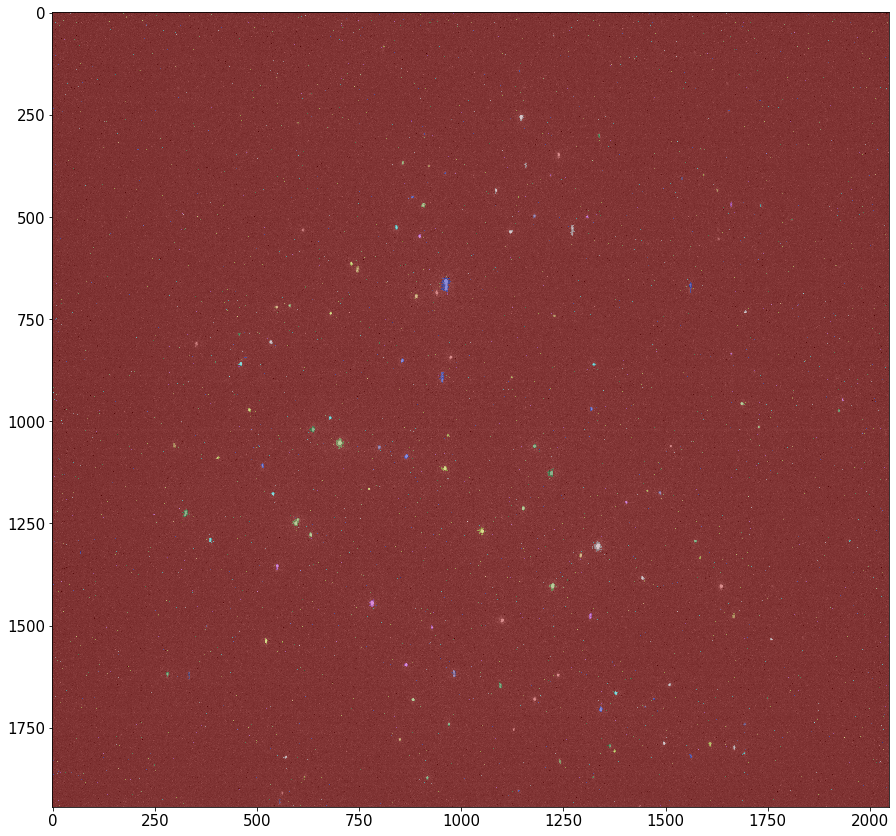

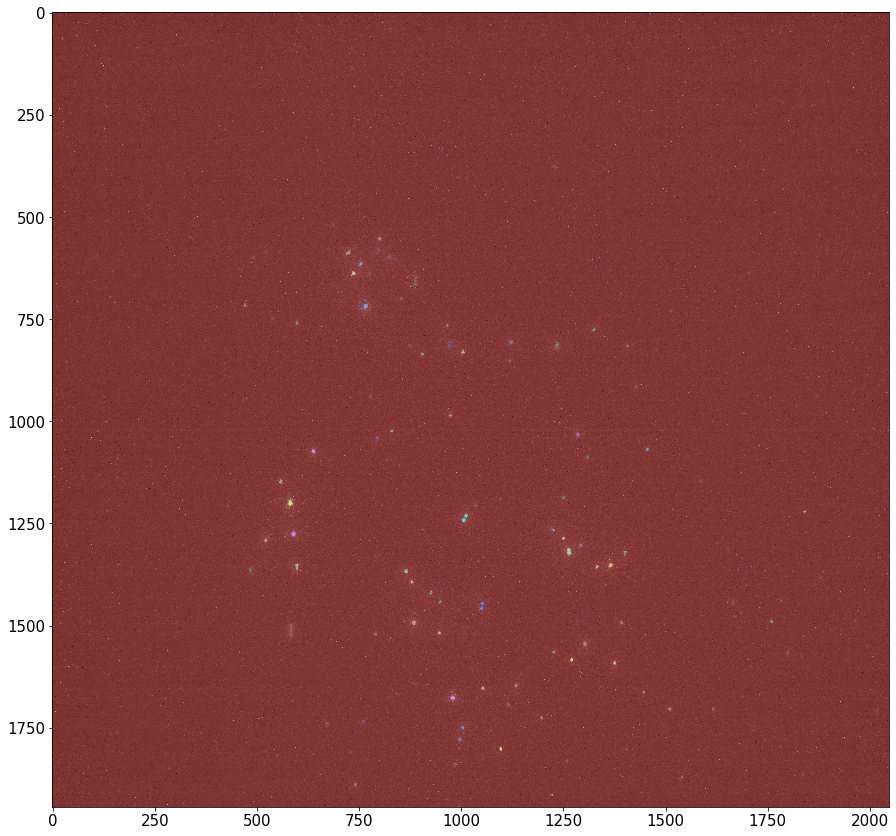

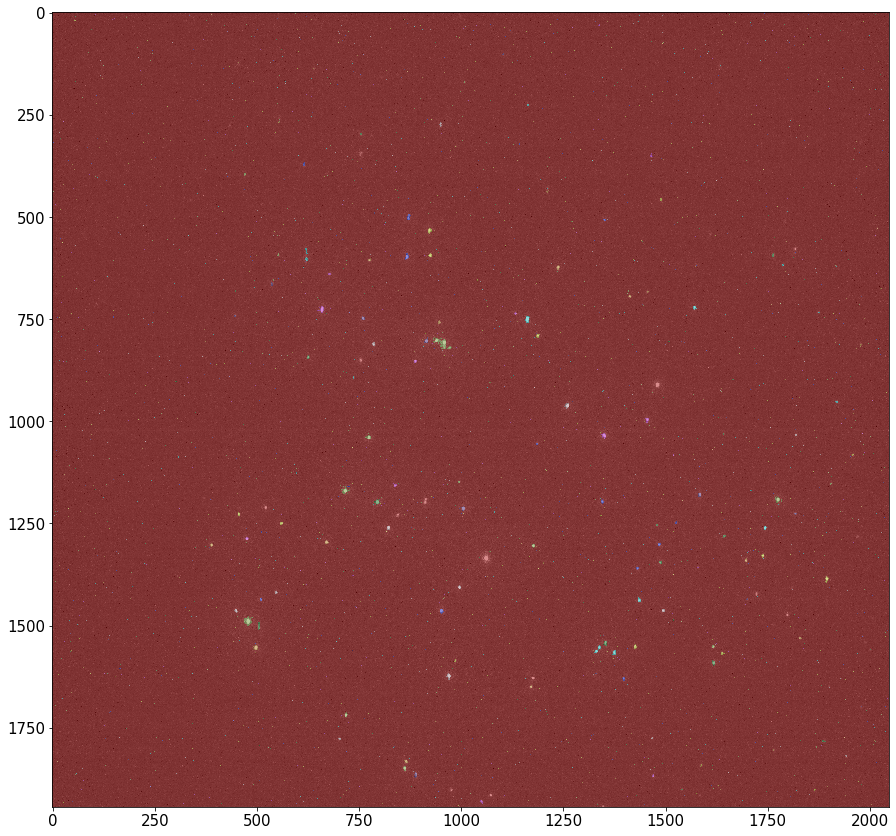

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
  
from PIL import Image
from pylab import *
from pathlib import Path
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.filters import threshold_yen
from skimage.morphology import closing, square
from skimage.segmentation import clear_border
from skimage.color import label2rgb
%matplotlib inline

shear_rate_25k = pd.DataFrame(columns=['shear rate', 'eccentricity', 'convex_area',
                                      'major_axis_length','minor_axis_length','orientation'])

# iterate over all images in a certain folder
pathlist = Path('Raw data_All images/25k_3 images').glob('**/*.jpg')
for path in pathlist:
    path_in_str = str(path)
#    print(path_in_str)
    
    # open the image
    image = Image.open(path_in_str)
    
    # crop out scale bar
    width, height = image.size
    left = 0
    top = 0
    right = width
    bottom = height-100
    im1 = image.crop((left, top, right, bottom)) 
#    im1.show()
    
    # apply threshold
    img_array = np.array(im1)
    image_gray = rgb2gray(img_array)
    image = image_gray
    thresh = threshold_yen(image)
    binary = image <= thresh
    bw = closing(image > thresh, square(3))
    plt.rcParams.update({'font.size': 15})
#    plt.figure(figsize = (15,15))
#    imshow(binary,cmap=plt.cm.gray)
    
    # remove artifacts connected to image border
    cleared = clear_border(bw)
    
    # label image regions
    label_image = label(cleared)
    image_label_overlay = label2rgb(label_image, image=image)
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(image_label_overlay)
    
    # extract features
    props = regionprops(label_image,intensity_image=image_gray, coordinates='xy')
    
    for i in props: 
        # exclude circular(folded) and small(might be background noise) dots
        if i.eccentricity>.8 and i.convex_area>20:                                
            shear_rate_25k = shear_rate_25k.append({'shear rate': 25000, 'eccentricity': i.eccentricity, 
                                                    'convex_area': i.convex_area,'major_axis_length': i.major_axis_length,
                                                   'minor_axis_length': i.minor_axis_length,'orientation': i.orientation},
                                                   ignore_index=True)

#print("25k_3 images", shear_rate_25k, sep='\n')

In [3]:
# save dataframe
shear_rate_25k.to_pickle('shear_rate_25k')
a = pd.read_pickle('shear_rate_25k')
print(a)

    shear rate  eccentricity  convex_area  major_axis_length  \
0      25000.0      0.803396         23.0           6.940039   
1      25000.0      0.830375        149.0          17.764211   
2      25000.0      0.800690         46.0           9.367683   
3      25000.0      0.856609        103.0          15.378487   
4      25000.0      0.877616         72.0          12.559256   
5      25000.0      0.879741         70.0          12.844913   
6      25000.0      0.968258        251.0          30.309017   
7      25000.0      0.881559         99.0          15.569358   
8      25000.0      0.834670        734.0          37.555787   
9      25000.0      0.978047        183.0          29.726444   
10     25000.0      0.852018        136.0          16.383883   
11     25000.0      0.942351        253.0          27.608759   
12     25000.0      0.830673         31.0           8.154201   
13     25000.0      0.895311         82.0          14.481804   
14     25000.0      0.824091         78.